In [1]:
from mpl_toolkits.mplot3d import axes3d
import os
import matplotlib.pyplot as plt
import numpy as np


def function_to_minimize(x, y):
    return x**3 + x**4 + y**4 + 4 * y ** 2 + 5 - x


def xgradient(x, y):
    return 3 * x**2 + 4*x**3 - 1


def ygradient(x, y):
    return 4 * y**3 + 8 * y

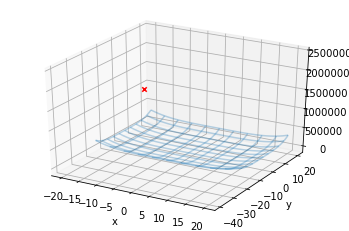

OverflowError: (34, 'Numerical result out of range')

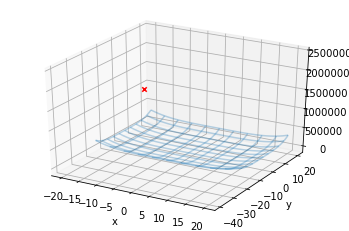

In [2]:
%matplotlib inline
import pylab as pl
import time
from IPython import display

# plot the function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.linspace(-20, 20)
Y = np.linspace(-20, 20)
X, Y = np.meshgrid(X, Y)
S = X + Y

for i in range(S.shape[0]):
    for j in range(S.shape[1]):
        S[i][j] = function_to_minimize(X[i][j], Y[i][j])

fig = ax.plot_wireframe(X, Y, S, rstride=5, cstride=5, alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
display.display(pl.gcf())

# initialize the starting point
scope = 30
x_star = np.random.uniform(-scope, scope)
y_star = np.random.uniform(-scope, scope)

# iterate the gradient algorithm
N_iterations = 100
alpha = 0.001
for iteration in range(N_iterations):
    x_gradient_vector = xgradient(x_star, y_star)
    y_gradient_vector = ygradient(x_star, y_star)
    x_star = x_star - alpha * x_gradient_vector
    y_star = y_star - alpha * y_gradient_vector
    z = function_to_minimize(x_star, y_star)
    if iteration % 20 == 0:
        ax.scatter(x_star, y_star, z, marker="x", color="red")
        # pl.style.use('dark_background')
        # print(f"x* : {x_star:.2f}, y* : {y_star:.2f}, z : {z:.2f}")
        display.clear_output(wait=True)
        display.display(pl.gcf())
        time.sleep(0.2)